This notebook consists of graph creation as well as analysis of results.

# All graphs HS+ gensim + logistic regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('gensim_grid_search_hs_massive.csv', header=0,sep=",")
df.head()

,dimensions,number_of_walks,walk_length,window_size,duration,f1_binary_lr,f1_macro_lr,f1_binary_xgb,f1_macro_xgb,duration_sd,f1_binary_lr_sd,f1_macro_lr_sd,f1_binary_xgb_sd,f1_macro_xgb_sd
0,32,1,2,2,0.213254,0.115927,0.433013,0.000000,0.485962,0.009627,0.014913,0.014964,0.000000,0.000793
1,32,1,4,2,0.293293,0.128434,0.453551,0.038036,0.505355,0.038729,0.015608,0.007198,0.049427,0.024893
2,32,1,8,2,0.384541,0.176847,0.499847,0.288305,0.632132,0.001012,0.030117,0.017754,0.140002,0.071311
3,32,1,16,2,0.582679,0.174055,0.507489,0.478812,0.729643,0.003393,0.004385,0.009193,0.035612,0.018250
4,32,1,32,2,1.032566,0.169586,0.490885,0.433601,0.706770,0.032644,0.021767,0.020062,0.117437,0.060400


In [2]:
import numpy as np

freeze_dict = {"dimensions": 256,
               "number_of_walks": 16,
               "walk_length": 32,
               "window_size":32}
name_dict = {"dimensions": "embedding dimension",
             "number_of_walks": "number of walks",
             "walk_length": "walk length",
             "window_size": "window size",
             "f1_binary_xgb": "F1 binary",
             "f1_macro_xgb": "F1 macro"}

def plot_variables(df, freeze_1, freeze_2, x_axis, colors,score_name, freeze_dict=freeze_dict, name_dict=name_dict, use_log2 = True, y_limits = None):
    selected_rows = df[df[freeze_1] == freeze_dict[freeze_1]]
    selected_rows = selected_rows[selected_rows[freeze_2] == freeze_dict[freeze_2]]

    # Group the data by n value
    grouped = selected_rows.groupby(colors)
    
    # Plot a line for each n value
    for name, group in grouped:
        yerr = group[score_name + "_sd"]
        plt.plot(group[x_axis], group[score_name], label=f'{name}')
        plt.scatter(group[x_axis], group[score_name], marker='o', s=10)

    if use_log2:
        plt.xscale('log', base=2)
        
    # Set y-axis limits if specified
    if y_limits is not None:
        plt.ylim(y_limits)
        
    # Making graph nice looking
    plt.xticks(group[x_axis])
    plt.xlabel(name_dict[x_axis])
    plt.ylabel(name_dict[score_name])
    plt.title(f'Score vs. {name_dict[x_axis]} for different {name_dict[colors]}')
    plt.legend(loc='lower right',bbox_to_anchor=(1.3, 0), title = f'{name_dict[colors]}')
    # Show the plot
    plt.show()

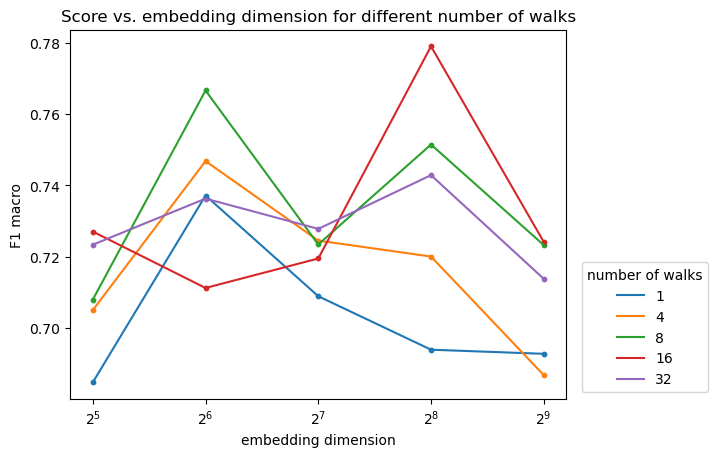

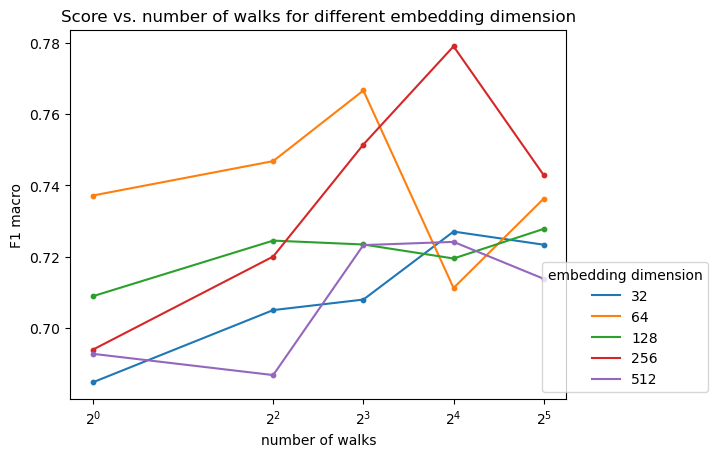

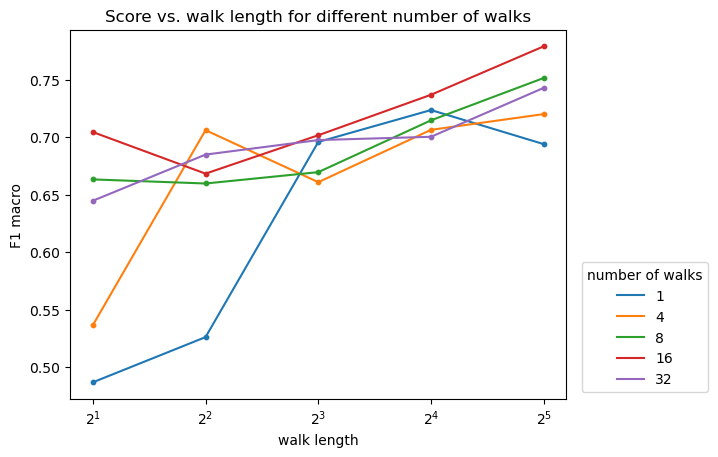

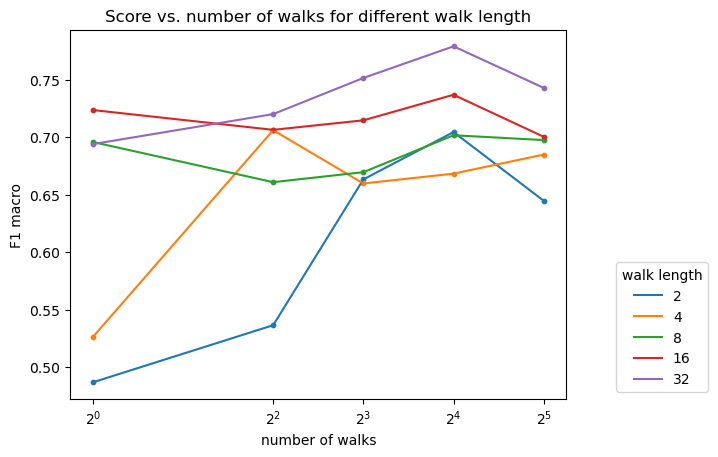

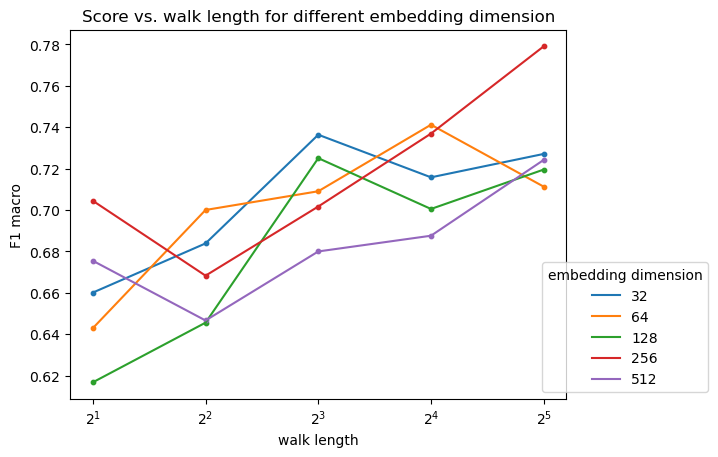

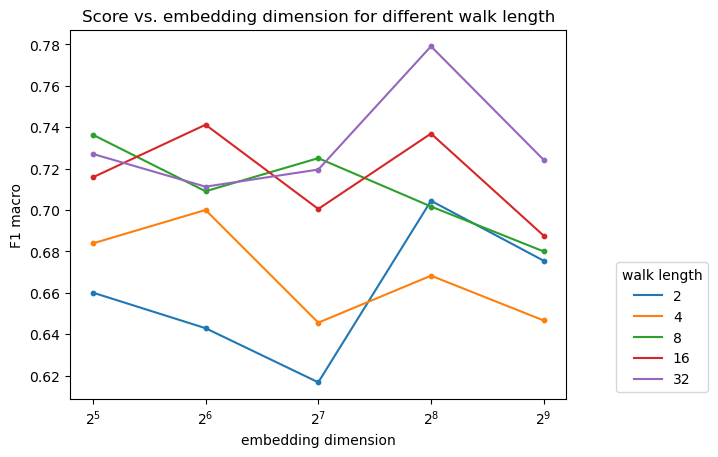

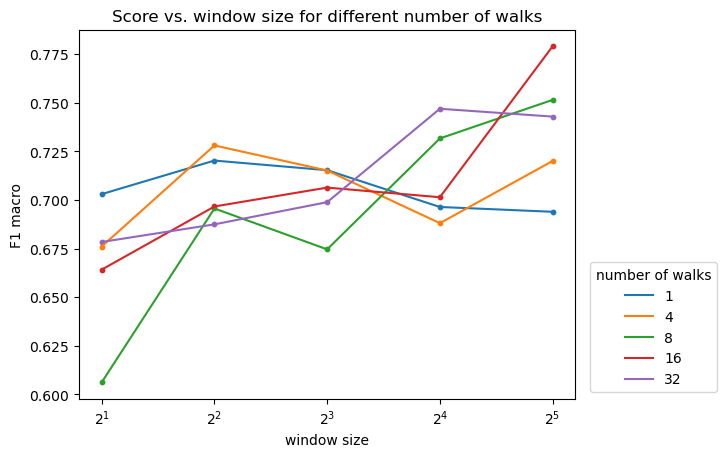

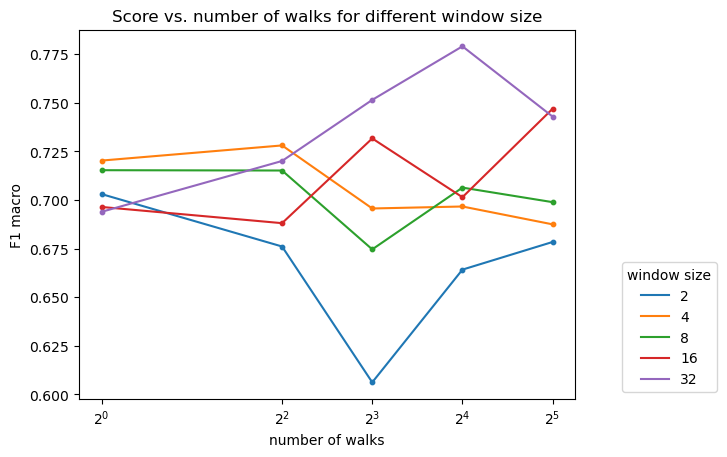

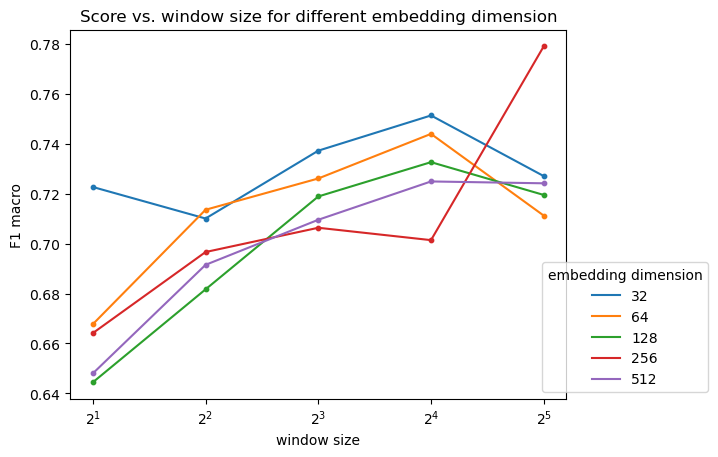

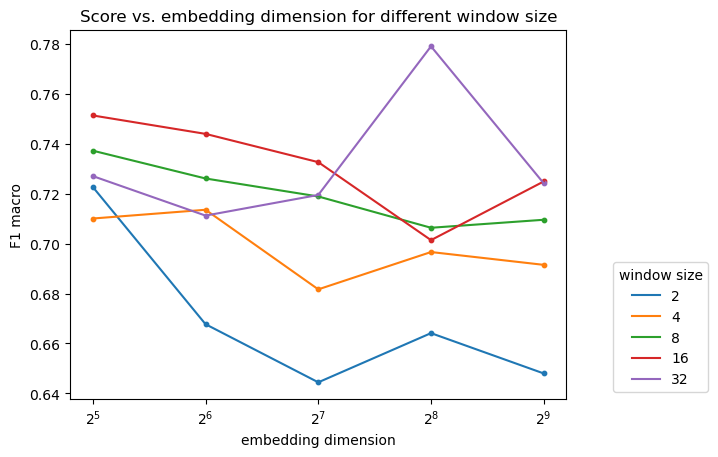

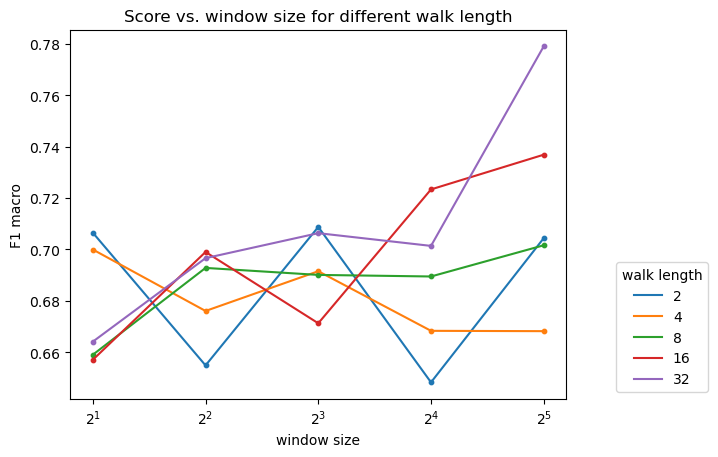

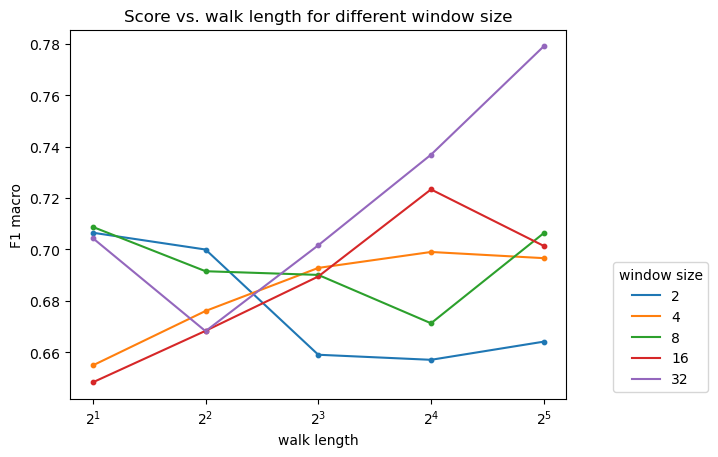

In [3]:
col_names = ["window_size","walk_length","dimensions","number_of_walks"]

pairs = [(col_names[i], col_names[j]) for i in range(len(col_names)) for j in range(i+1, len(col_names))]

for pair in pairs:
    f_1 = pair[0]
    f_2 = pair[1]
    
    remaining = [s for s in col_names if s != f_1 and s != f_2]
    #plotting first graph
    plot_variables(df,f_1,f_2,remaining[0],remaining[1],"f1_macro_xgb")
    #plotting 2nd graph
    plot_variables(df,f_1,f_2,remaining[1],remaining[0],"f1_macro_xgb")

In [4]:
import scipy.stats

col_names = ["window_size","walk_length","dimensions","number_of_walks"]
for name in col_names:
    remaining = [s for s in col_names if s != name]
    selected_rows = df[df[remaining[0]] == freeze_dict[remaining[0]]]
    selected_rows = selected_rows[selected_rows[remaining[1]] == freeze_dict[remaining[1]]]
    selected_rows = selected_rows[selected_rows[remaining[2]] == freeze_dict[remaining[2]]]
    print(name)
    print(f"Spearman : {scipy.stats.spearmanr(selected_rows['f1_macro_xgb'], selected_rows[name]).correlation}")
    r,p = scipy.stats.pearsonr(selected_rows['f1_macro_xgb'], selected_rows[name])
    print(f"Pearson : {r}")

window_size
Spearman : 0.8999999999999998
Pearson : 0.9353786960413364
walk_length
Spearman : 0.7
Pearson : 0.9279537545178803
dimensions
Spearman : 0.19999999999999998
Pearson : 0.22634101968383308
number_of_walks
Spearman : 0.7
Pearson : 0.522904699037017


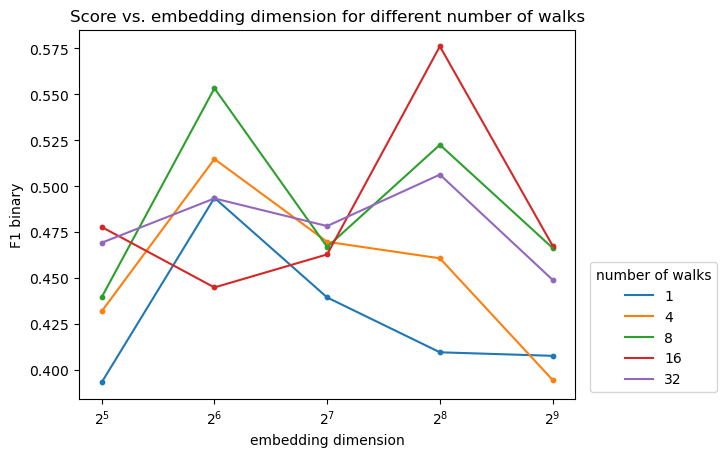

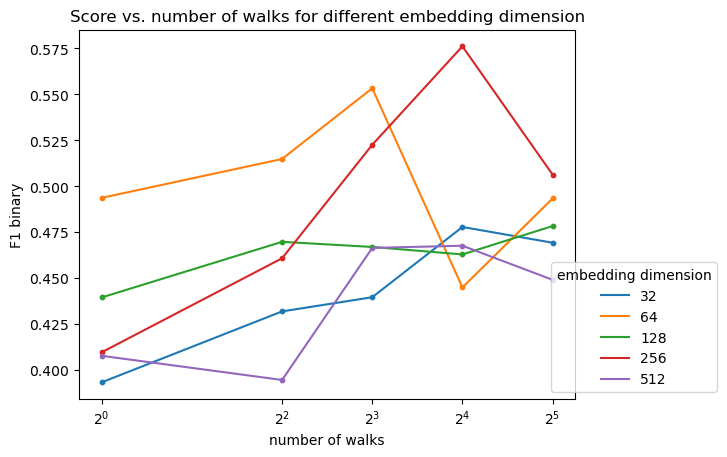

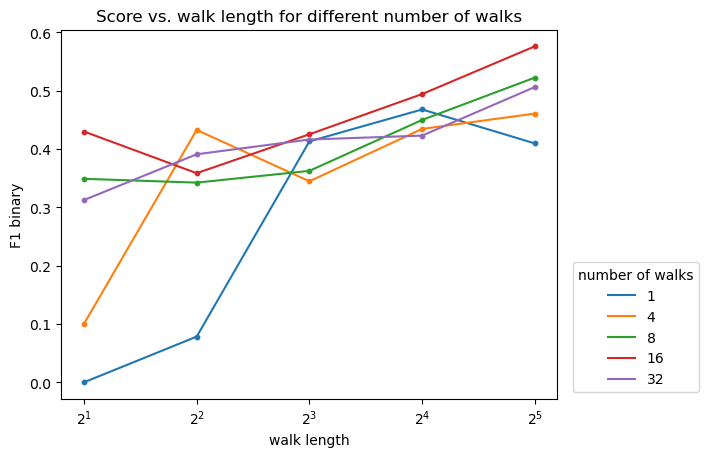

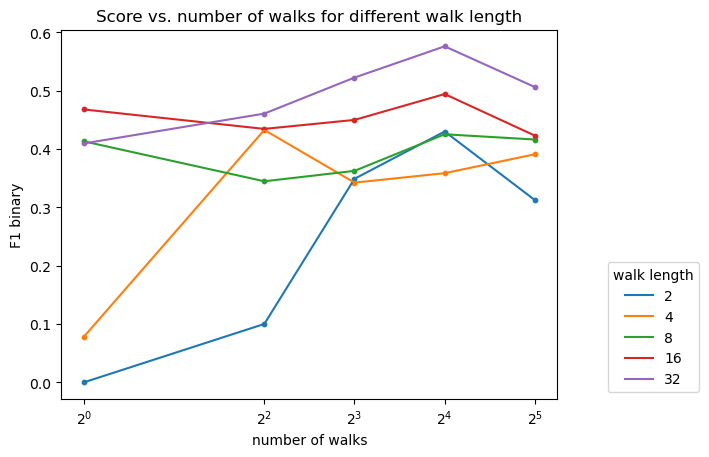

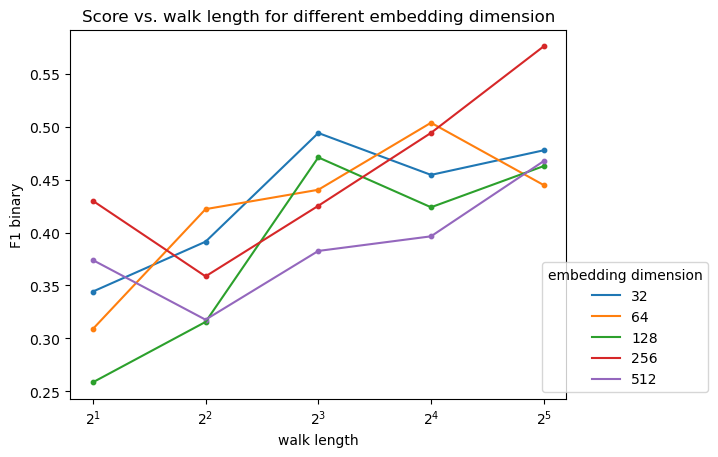

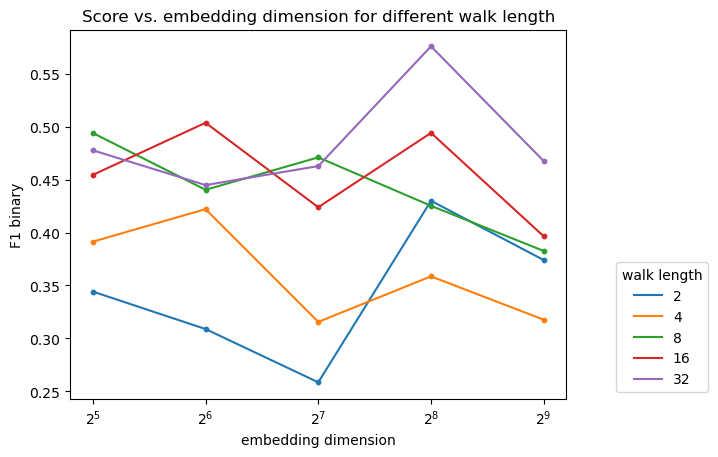

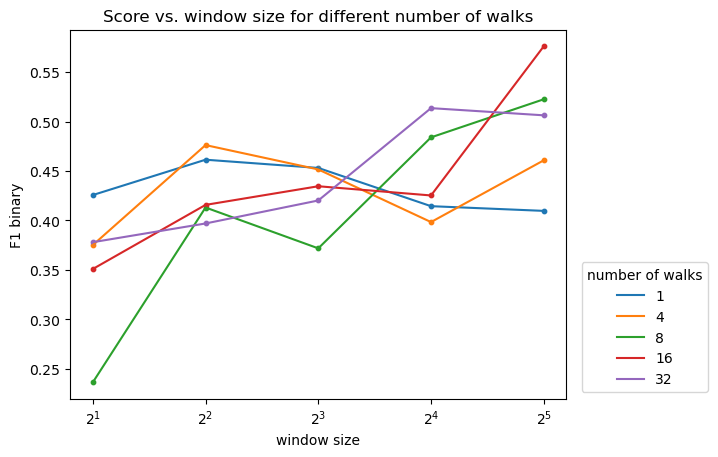

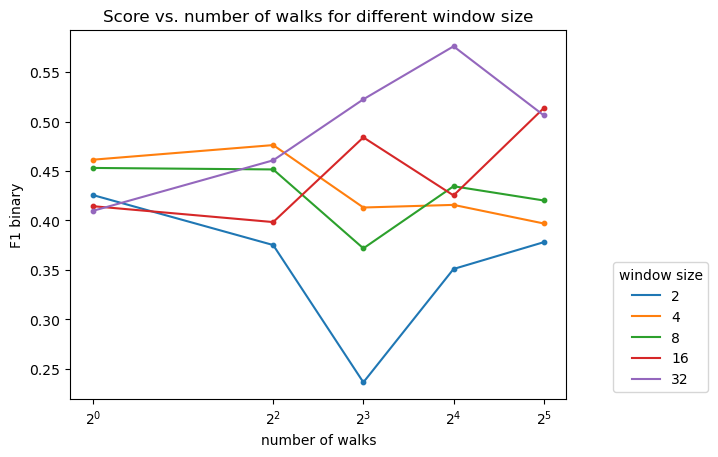

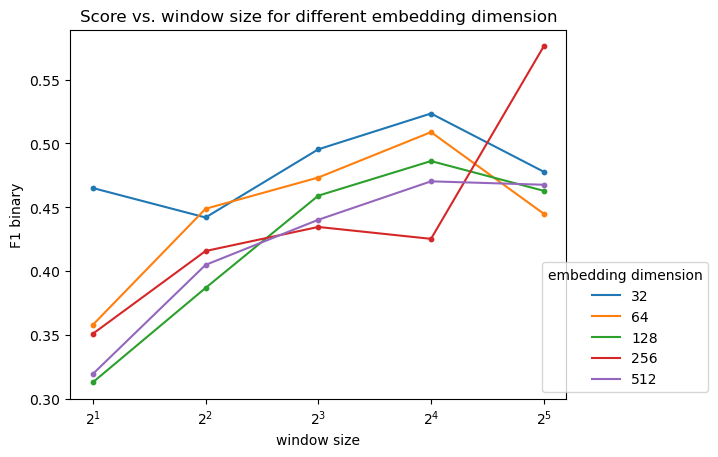

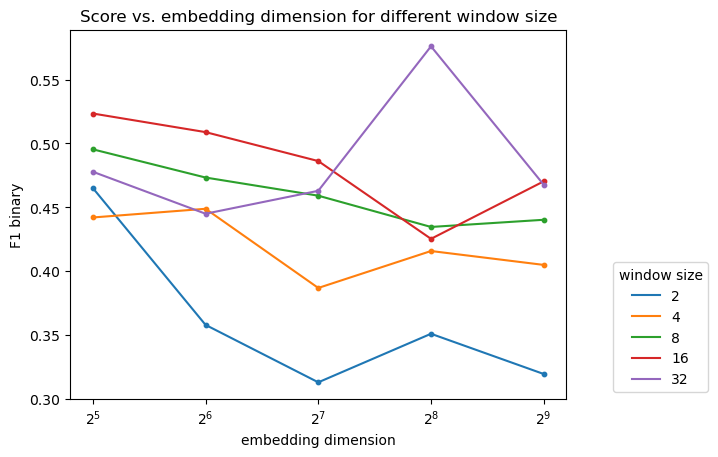

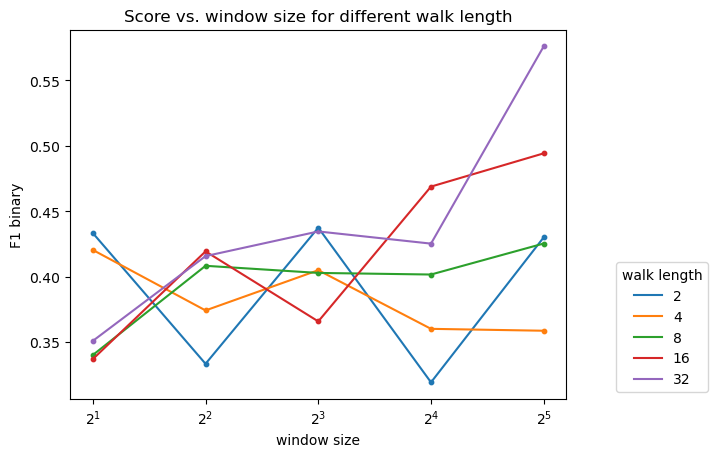

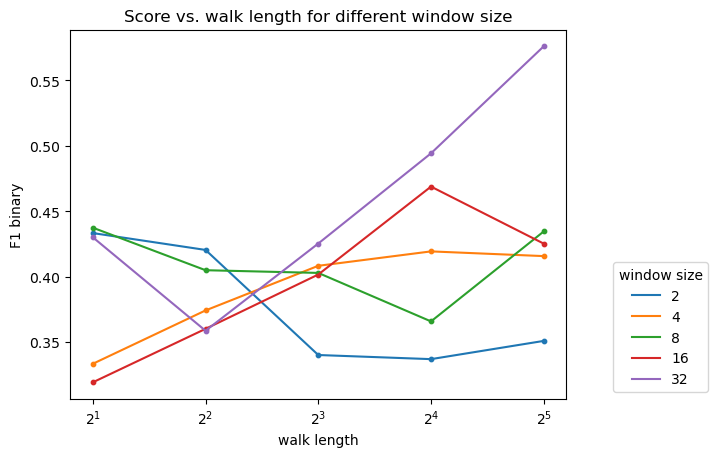

In [5]:
col_names = ["window_size","walk_length","dimensions","number_of_walks"]

pairs = [(col_names[i], col_names[j]) for i in range(len(col_names)) for j in range(i+1, len(col_names))]

for pair in pairs:
    f_1 = pair[0]
    f_2 = pair[1]
    
    remaining = [s for s in col_names if s != f_1 and s != f_2]
    #plotting first graph
    plot_variables(df,f_1,f_2,remaining[0],remaining[1],"f1_binary_xgb")
    #plotting 2nd graph
    plot_variables(df,f_1,f_2,remaining[1],remaining[0],"f1_binary_xgb")

# Best models for table

## Hierarchical softmax

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('gensim_grid_search_hs_massive.csv', header=0,sep=",")

In [39]:
df = df.sort_values('f1_binary_lr', ascending=False).reset_index(drop=True)
df.sort_values('f1_binary_lr', ascending=False).reset_index(drop=True).head()

,dimensions,number_of_walks,walk_length,window_size,duration,f1_binary_lr,f1_macro_lr,f1_binary_xgb,f1_macro_xgb,duration_sd,f1_binary_lr_sd,f1_macro_lr_sd,f1_binary_xgb_sd,f1_macro_xgb_sd
0,512,16,32,32,114.606134,0.345752,0.643496,0.467621,0.724154,0.691269,0.039769,0.019873,0.088318,0.045392
1,512,4,32,16,21.461170,0.344269,0.640136,0.367590,0.672421,0.090217,0.037102,0.020221,0.055104,0.027949
2,512,16,32,8,50.134146,0.338061,0.637480,0.440166,0.709551,0.419182,0.029190,0.018287,0.126989,0.065171
3,512,32,16,32,77.742666,0.334406,0.637114,0.413038,0.695807,0.473285,0.044332,0.024595,0.113743,0.058040
4,512,16,32,16,78.120393,0.333913,0.637962,0.470306,0.724899,0.248728,0.053188,0.028033,0.099387,0.051311


In [37]:
def show_only_needed(df,binary_or_macro = "binary", logistic_or_xgboost = "lr"):
    if binary_or_macro == "binary" :
        df_tmp = df.sort_values('f1_binary_'+logistic_or_xgboost, ascending=False).reset_index(drop=True)
    elif binary_or_macro == "macro":
        df_tmp = df.sort_values('f1_macro_'+logistic_or_xgboost, ascending=False).reset_index(drop=True)
    else:
        assert False, "Error"
    df_tmp = df_tmp[['f1_binary_'+logistic_or_xgboost,
                 'f1_binary_'+logistic_or_xgboost+"_sd",
                 'f1_macro_'+logistic_or_xgboost,
                 'f1_macro_'+logistic_or_xgboost+"_sd",
                 'duration', 'duration_sd',
                 'dimensions','number_of_walks','walk_length','window_size']]
    df_tmp = df_tmp.head(3).round(3)
    df_tmp = df_tmp.astype(str)
    df_tmp['binary'] = df_tmp.iloc[:, 0].str.cat(df_tmp.iloc[:, 1], sep=' +/- ')
    df_tmp['macro'] = df_tmp.iloc[:, 2].str.cat(df_tmp.iloc[:, 3], sep=' +/- ')
    df_tmp['duration_'] = df_tmp.iloc[:, 4].str.cat(df_tmp.iloc[:, 5], sep=' +/- ')
    df_tmp.drop(df_tmp.columns[[0,1,2,3,4,5]], axis=1, inplace=True)
    df_tmp = df_tmp[['binary','macro','duration_',
             'dimensions','number_of_walks','walk_length','window_size']]
    return df_tmp

In [42]:
show_only_needed(df,"binary","lr")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.346 +/- 0.04,0.643 +/- 0.02,114.606 +/- 0.691,512,16,32,32
1,0.344 +/- 0.037,0.64 +/- 0.02,21.461 +/- 0.09,512,4,32,16
2,0.338 +/- 0.029,0.637 +/- 0.018,50.134 +/- 0.419,512,16,32,8


In [41]:
show_only_needed(df,"macro","lr")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.346 +/- 0.04,0.643 +/- 0.02,114.606 +/- 0.691,512,16,32,32
1,0.344 +/- 0.037,0.64 +/- 0.02,21.461 +/- 0.09,512,4,32,16
2,0.334 +/- 0.053,0.638 +/- 0.028,78.12 +/- 0.249,512,16,32,16


In [43]:
show_only_needed(df,"binary","xgb")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.576 +/- 0.085,0.779 +/- 0.044,74.729 +/- 0.191,256,16,32,32
1,0.56 +/- 0.072,0.771 +/- 0.037,7.054 +/- 0.524,64,8,16,16
2,0.557 +/- 0.051,0.77 +/- 0.027,5.236 +/- 0.077,32,8,16,8


In [44]:
show_only_needed(df,"macro","xgb")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.576 +/- 0.085,0.779 +/- 0.044,74.729 +/- 0.191,256,16,32,32
1,0.56 +/- 0.072,0.771 +/- 0.037,7.054 +/- 0.524,64,8,16,16
2,0.557 +/- 0.051,0.77 +/- 0.027,5.236 +/- 0.077,32,8,16,8


## No chierarchical softamx

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('gensim_grid_search_nohs_massive.csv', header=0,sep=",")

In [47]:
show_only_needed(df,"binary","lr")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.118 +/- 0.023,0.466 +/- 0.016,0.144 +/- 0.008,128,1,2,2
1,0.117 +/- 0.021,0.431 +/- 0.008,0.57 +/- 0.035,32,8,2,16
2,0.116 +/- 0.007,0.44 +/- 0.009,0.183 +/- 0.002,32,1,4,32


In [48]:
show_only_needed(df,"macro","lr")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.113 +/- 0.01,0.503 +/- 0.009,0.27 +/- 0.002,512,1,8,32
1,0.104 +/- 0.023,0.501 +/- 0.017,3.493 +/- 0.05,512,32,4,8
2,0.111 +/- 0.023,0.501 +/- 0.012,0.837 +/- 0.006,512,1,32,8


In [49]:
show_only_needed(df,"binary","xgb")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.014 +/- 0.028,0.494 +/- 0.014,3.361 +/- 0.093,64,32,4,2
1,0.014 +/- 0.028,0.494 +/- 0.014,1.642 +/- 0.06,512,8,8,2
2,0.014 +/- 0.028,0.494 +/- 0.014,1.054 +/- 0.049,64,16,2,8


In [50]:
show_only_needed(df,"macro","xgb")

,binary,macro,duration_,dimensions,number_of_walks,walk_length,window_size
0,0.014 +/- 0.028,0.494 +/- 0.014,0.311 +/- 0.004,512,4,2,2
1,0.014 +/- 0.028,0.494 +/- 0.014,0.824 +/- 0.004,128,4,8,2
2,0.014 +/- 0.028,0.494 +/- 0.014,12.131 +/- 0.115,128,16,32,8
